<a href="https://colab.research.google.com/github/LilianaMendez/CUARTA-4-ACTIVIDAD-INTELIGENCIA-ARTI/blob/main/IA/actividad_4_InAr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [26]:
print(data) #reviso que si quede cargada la bd

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...

In [27]:
data.shape  #reviso los datos en columnas y filas 

(440, 8)

In [28]:
data.isnull().sum()  #reviso si hay datos null

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [29]:
data.dtypes  #reviso tipo de datos 

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [30]:
indices = [26, 185, 392]   #defino las filas que utilzo como muestra , y almaceno el conjunto de datos en la variable  muestras
muestras = pd.DataFrame(data.loc[indices],
                       columns =data.keys()).reset_index(drop = True)

In [31]:
print(muestras) #reviso que hayan quedado en la variable muestras las 3 filas seleccionadas que nos mostraran a que cluster pertenece

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        1       3   9898   961     2861    3151               242         833
1        1       3   8170  6448     1139    2181                58         247
2        1       3    518  4180     3600     659               122         654


In [32]:
data = data.drop(indices, axis = 0) # elimino las filas para que el conjunto de datos no se entreno con esa informacion

In [33]:
data = data.drop(['Region', 'Channel'], axis = 1) #elimino las columnas que no voy a utilizar 

In [34]:
print(muestras)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        1       3   9898   961     2861    3151               242         833
1        1       3   8170  6448     1139    2181                58         247
2        1       3    518  4180     3600     659               122         654


In [35]:
from sklearn import preprocessing

In [36]:
data_escalada = preprocessing.Normalizer().fit_transform(data)  #Escalamiento los datos y trasnformacion de datos 

In [37]:
print(data_escalada) # los datos pasan a una misma escala, es decir son flotantes

[[0.70833271 0.53987376 0.42274083 0.01196489 0.14950522 0.07480852]
 [0.44219826 0.61470384 0.59953989 0.11040858 0.20634248 0.11128583]
 [0.39655169 0.5497918  0.47963217 0.15011913 0.2194673  0.48961931]
 ...
 [0.36446153 0.38846468 0.7585445  0.01096068 0.37223685 0.04682745]
 [0.93773743 0.1805304  0.20340427 0.09459392 0.01531    0.19365326]
 [0.67229603 0.40960124 0.60547651 0.01567967 0.11506466 0.01254374]]


In [38]:
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras) #hago el mismo escalamiento y procesamiento con los datos de la 
#variable muestras 

In [39]:
from sklearn.cluster import KMeans #importo KMeans para agrupar puntos de datos similares en clústeres.

In [40]:
x = data_escalada.copy()  #	defino la variable x donde la defino con data_escalada

In [41]:
inercia = []
for i in range (1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                      max_iter = 300, n_init = 10)
    algoritmo.fit(x)
    inercia.append(algoritmo.inertia_)  # se calcula el valor total del cuadro dentro del clúster 

In [42]:
import matplotlib.pyplot as plt

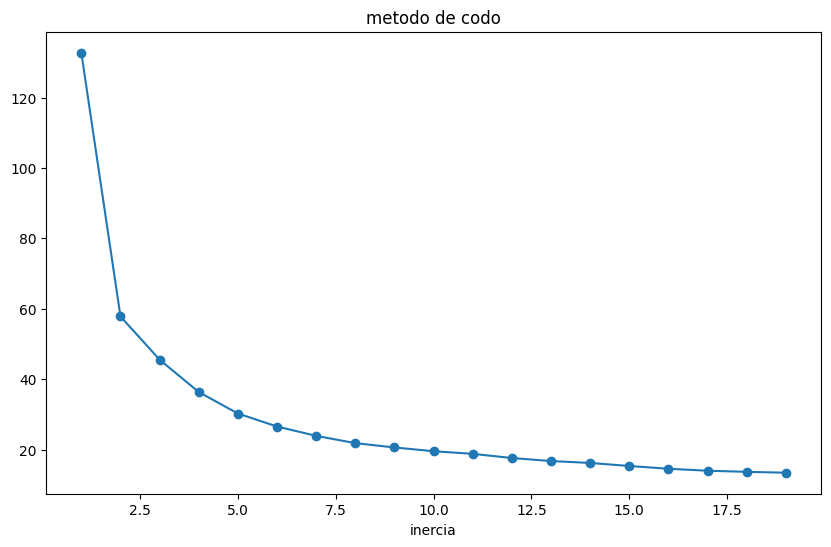

In [48]:
plt.figure(figsize=[10,6])   #parametrizo el grafico para ver el metodo del codo donde se evidencia que esta entre 5 y 6
plt.title('metodo de codo')
plt.xlabel('inercia')
plt.plot(list(range(1,20)), inercia, marker='o')

In [52]:
algoritmo = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10)  #•	Aplico el algoritmo de agrupamiento

In [63]:
algoritmo.fit(x)  #entreno el modelo

KMeans(n_clusters=6, n_init=10)

In [64]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_  #	Obtengo los centroides y las etiquetas

In [65]:
print(centroides)  # muestra las cordenadas de cada cluster

[[0.95483121 0.12653657 0.16445231 0.11781824 0.03097079 0.05986006]
 [0.70416878 0.33372401 0.5134971  0.09440153 0.17850685 0.10100062]
 [0.81378514 0.1962803  0.20642012 0.45325931 0.03800199 0.08427637]
 [0.29471806 0.70859002 0.4593012  0.17262671 0.11986697 0.19305044]
 [0.16494061 0.42169156 0.77848814 0.07667063 0.32901397 0.07048522]
 [0.42303472 0.18455606 0.34478159 0.75343783 0.05350116 0.08201898]]


In [ ]:
muestra_prediccion = algoritmo.predict(muestras_escalada)

In [ ]:
print(etiquetas) # muestra cada uno de los datos del conjunto de datos utilizados para entrenar el modelo que va de 0 al 5 estos datos nos sirve para graficar 

In [74]:
from sklearn.decomposition import PCA

In [75]:
modelo_pca = PCA(n_components = 2)  #entreno el modelo
modelo_pca.fit(x)
pca = modelo_pca.transform(x)

In [76]:
centroides_pca = modelo_pca.transform(centroides) #hago reduccion a los centroides

In [81]:
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown'] #asigno los colores para los centroides
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))] #defino colores de los cluster


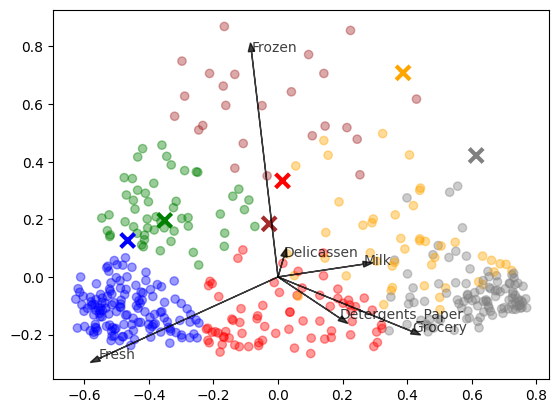

In [128]:
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, #grafico componentes de pca Análisis de Componentes Principales
            marker = 'o', alpha = 0.4)
plt.scatter(centroides_pca[:, 0], centroides[:, 1], 
            marker = 'x', s = 100, linewidths = 3, c = colores)  #grafico los centroides
import numpy as np

xvector = modelo_pca.components_[0] * max(pca[:, 0]) #guardo los datos en una variable x y y 
yvector = modelo_pca.components_[1] * max(pca[:, 1]) 
columnas = data.columns

for i in range(len(columnas)):   #grafico los cluster con la distancia del vector 
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black',
              width = 0.0005, head_width = 0.02, alpha = 0.75)
 

    plt.text(xvector[i], yvector[i], list(columnas) [i], color = 'black',
           alpha=0.75)
    
plt.show()   # se ve la posicion que debe tener cada producto segun el analisis